# Hand Gesture Classification using CNN with keras

### import all the required libraries

In [1]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import keras
from keras import backend as K

C:\Users\Lenovo\Anaconda_64\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.layers import Dense,Activation,Dropout
from keras.layers import Conv2D,MaxPooling2D,Flatten
from keras.models import Sequential


### load the train_signs and test_signs from h5py file

In [3]:
train_dataset = h5py.File('train_signs.h5', "r")
test_dataset =h5py.File('test_signs.h5',"r")

### get the images set and labesl for training and test set 

In [4]:
x_train=np.array(train_dataset['train_set_x'][:])
y_train=np.array(train_dataset['train_set_y'][:])
x_test=np.array(test_dataset['test_set_x'][:])
xxx_test=np.array(test_dataset['test_set_x'][:])
y_test=np.array(test_dataset['test_set_y'][:])

In [5]:
classes = np.array(test_dataset["list_classes"][:])
classes=classes.reshape(1,classes.shape[0])
classes

array([[0, 1, 2, 3, 4, 5]], dtype=int64)

#### check for one image

y= 2


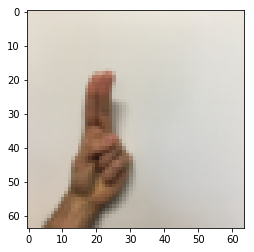

In [6]:
plt.imshow(x_train[10])
print('y=',np.squeeze(y_train[10]))

### convert the pixels value for training and test set to lie b/w 0 and 1

In [7]:
x_train=x_train/255
x_test=x_test/255

#### convert class values to binary class metric for trainig and test set

In [8]:
y_train=keras.utils.to_categorical(y_train,classes.shape[1])
y_test=keras.utils.to_categorical(y_test,classes.shape[1])

In [9]:
print ("number of training examples = " + str(x_train.shape[0]))
print ("number of test examples = " + str(x_test.shape[0]))
print ("X_train shape: " + str(x_train.shape))
print ("Y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(x_test.shape))
print ("Y_test shape: " + str(y_test.shape))

number of training examples = 1080
number of test examples = 120
X_train shape: (1080, 64, 64, 3)
Y_train shape: (1080, 6)
X_test shape: (120, 64, 64, 3)
Y_test shape: (120, 6)


## create the convolutional neural network architecture
### using keras

In [10]:
model=Sequential()
model.add(Conv2D(8,(4,4),strides=(1,1),padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D((8,8),strides=(8,8),padding='same'))
model.add(Conv2D(16,(2,2),strides=(1,1),padding='same'))
model.add(Activation('relu'))

model.add(MaxPooling2D((4,4),strides=(4,4),padding='same'))
model.add(Flatten())

model.add(Dense(6,))

### add the softmax function at the end of NN architecture to get output equal to no of classes

In [11]:
model.add(Activation('softmax'))

### compile model calculating loss and accuracy using adam optimzer

In [12]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [14]:
model.fit(x_train,y_train,epochs=140,batch_size=64,validation_data=(x_test,y_test))

Train on 1080 samples, validate on 120 samples
Epoch 1/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.5003 - acc: 0.8389 - val_loss: 0.6547 - val_acc: 0.7250
Epoch 2/140
1080/1080 [==============================] - 3s 2ms/step - loss: 0.4902 - acc: 0.8491 - val_loss: 0.6495 - val_acc: 0.7333
Epoch 3/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.4862 - acc: 0.8370 - val_loss: 0.6267 - val_acc: 0.7417
Epoch 4/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.4822 - acc: 0.8537 - val_loss: 0.6300 - val_acc: 0.7333
Epoch 5/140
1080/1080 [==============================] - 3s 2ms/step - loss: 0.4782 - acc: 0.8546 - val_loss: 0.6232 - val_acc: 0.7250
Epoch 6/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.4702 - acc: 0.8583 - val_loss: 0.6181 - val_acc: 0.7250
Epoch 7/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.4687 - acc: 0.8565 - val_loss: 0.6241 - val_acc: 0.7333
Epoch 8/

Epoch 61/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3530 - acc: 0.8806 - val_loss: 0.5166 - val_acc: 0.7500
Epoch 62/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3467 - acc: 0.8861 - val_loss: 0.5302 - val_acc: 0.7667
Epoch 63/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3471 - acc: 0.8907 - val_loss: 0.5155 - val_acc: 0.7500
Epoch 64/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3431 - acc: 0.8926 - val_loss: 0.5323 - val_acc: 0.7500
Epoch 65/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3435 - acc: 0.8917 - val_loss: 0.5467 - val_acc: 0.7333
Epoch 66/140
1080/1080 [==============================] - 3s 2ms/step - loss: 0.3444 - acc: 0.8889 - val_loss: 0.5564 - val_acc: 0.7583
Epoch 67/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.3476 - acc: 0.8935 - val_loss: 0.5485 - val_acc: 0.7417
Epoch 68/140
1080/1080 [========================

1080/1080 [==============================] - 3s 3ms/step - loss: 0.2864 - acc: 0.8981 - val_loss: 0.5044 - val_acc: 0.8000
Epoch 122/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2834 - acc: 0.9130 - val_loss: 0.4999 - val_acc: 0.7750
Epoch 123/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2596 - acc: 0.9167 - val_loss: 0.4585 - val_acc: 0.7833
Epoch 124/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2637 - acc: 0.9111 - val_loss: 0.5035 - val_acc: 0.7667
Epoch 125/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2745 - acc: 0.9065 - val_loss: 0.4653 - val_acc: 0.7833
Epoch 126/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2572 - acc: 0.9157 - val_loss: 0.4865 - val_acc: 0.8167
Epoch 127/140
1080/1080 [==============================] - 3s 3ms/step - loss: 0.2595 - acc: 0.9278 - val_loss: 0.5012 - val_acc: 0.7750
Epoch 128/140
1080/1080 [==============================

In [15]:
score=model.evaluate(x_test,y_test,batch_size=64)

120/120 [==============================] - 0s 2ms/step


In [16]:
print('test_loss: ',score[0])
print('test accuracy:',score[1])

test_loss:  0.46667462786038716
test accuracy: 0.8083333452542623


In [17]:
model.metrics_names

['loss', 'acc']

In [26]:
y_pred=model.predict(x_test)
#y_pred

In [28]:
x_test.shape

(120, 64, 64, 3)

In [116]:
yy_pred=[np.argmax(y, axis=None, out=None) for y in y_pred]

In [117]:
yy_test=[np.argmax(y, axis=None, out=None) for y in y_test]

In [118]:
yy_pred=np.array(yy_pred)
yy_test=np.array(yy_test)

In [119]:
yy_pred

array([0, 0, 0, 5, 1, 0, 3, 1, 5, 2, 5, 1, 3, 1, 1, 3, 5, 5, 0, 4, 5, 4,
       2, 5, 3, 5, 4, 1, 1, 4, 3, 1, 0, 5, 1, 1, 0, 2, 1, 3, 0, 3, 0, 2,
       3, 1, 1, 2, 0, 4, 4, 2, 3, 0, 4, 0, 4, 0, 2, 4, 5, 2, 2, 4, 0, 5,
       0, 1, 3, 5, 0, 5, 1, 1, 3, 4, 3, 5, 1, 5, 2, 0, 1, 0, 2, 2, 4, 1,
       4, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 2, 2, 2, 0, 1, 5, 3, 0, 1, 3, 4,
       1, 2, 2, 4, 2, 5, 1, 3, 2, 3], dtype=int64)

In [120]:
yy_test

array([0, 0, 0, 5, 1, 0, 3, 1, 5, 1, 5, 1, 3, 1, 1, 3, 5, 4, 0, 4, 5, 4,
       2, 5, 3, 5, 4, 2, 1, 2, 3, 1, 0, 3, 1, 1, 0, 4, 2, 3, 0, 3, 0, 2,
       3, 1, 2, 2, 0, 3, 4, 1, 2, 0, 4, 0, 4, 0, 4, 4, 5, 5, 2, 4, 4, 5,
       0, 1, 3, 5, 0, 4, 1, 2, 3, 4, 3, 5, 1, 5, 2, 0, 1, 4, 2, 4, 4, 1,
       4, 5, 5, 0, 0, 5, 5, 5, 3, 3, 5, 2, 2, 2, 0, 2, 5, 3, 0, 2, 3, 4,
       1, 3, 2, 4, 2, 2, 1, 3, 1, 3], dtype=int64)

## read image from the system

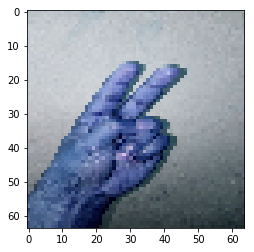

In [127]:
import cv2
img=cv2.imread('two.jpeg')
#o_p=model.predict(img)
img=img/255
tt=cv2.resize(img,(64,64))
tt.shape
plt.imshow(tt)


### use this particular function to predict over a single instance
#### (ii=model.predict(np.expand_dims(tt,axis=0)))


In [128]:
ii=model.predict(np.expand_dims(tt,axis=0))

In [129]:
ii

array([[8.7165019e-05, 2.1509833e-05, 7.3956251e-01, 1.8747884e-05,
        2.2144110e-05, 2.6028788e-01]], dtype=float32)

### convert the binary class metric to class values

In [130]:
ii_pred=[np.argmax(y, axis=None, out=None) for y in ii]

In [131]:
ii_pred=np.array(ii_pred)

In [132]:
ii_pred

array([2], dtype=int64)